<a href="https://colab.research.google.com/github/sn0422j/notebook/blob/master/pytorch_tutorial_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline


1.What is PyTorch?
================

https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html

It’s a Python-based scientific computing package targeted at two sets of
audiences:

-  A replacement for NumPy to use the power of GPUs
-  a deep learning research platform that provides maximum flexibility
   and speed




## Getting Started

### テンソル

テンソルは Numpy ndarray に似ていて、GPU上での計算を高速化することができる。

In [0]:
from __future__ import print_function
import torch

5x3行列をつくる。



In [3]:
x = torch.empty(5, 3)
print(x)

tensor([[6.9113e-36, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 2.8026e-45],
        [0.0000e+00, 1.1210e-44, 0.0000e+00],
        [1.4013e-45, 0.0000e+00, 0.0000e+00]])


ランダムな行列をつくる。



In [4]:
x = torch.rand(5, 3)
print(x)

tensor([[0.2553, 0.3564, 0.0559],
        [0.3048, 0.2562, 0.0573],
        [0.3803, 0.6725, 0.8471],
        [0.7688, 0.8718, 0.6431],
        [0.3577, 0.9662, 0.2733]])


dtype=longの零行列をつくる。

In [5]:
x = torch.zeros(5, 3, dtype=torch.long)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


データからテンソルをつくる。


In [6]:
x = torch.tensor([5.5, 3])
print(x)

tensor([5.5000, 3.0000])


または、既存のテンソルの構成に基づいてテンソルをつくることもできる。



In [7]:
x = x.new_ones(5, 3, dtype=torch.double)      # new_* methods take in sizes
print(x)

x = torch.randn_like(x, dtype=torch.float)    # override dtype!
print(x)                                      # result has the same size

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
tensor([[-0.3178, -1.5382,  1.3721],
        [ 1.0961,  1.2096, -0.8773],
        [-1.1012,  1.3569,  0.7226],
        [ 0.4846, -0.5752, -0.7836],
        [ 1.1172, -0.0717,  0.7485]])


大きさを確認する。（タプルで返される。）



In [8]:
print(x.size())

torch.Size([5, 3])


### 演算

いろんな記法がある。

加算１



In [9]:
y = torch.rand(5, 3)
print(x + y)

tensor([[ 0.1579, -1.3089,  2.2271],
        [ 1.1740,  1.7441, -0.7664],
        [-1.0032,  2.3311,  1.4279],
        [ 1.0814,  0.2319, -0.4127],
        [ 1.7457,  0.8136,  1.0747]])


加算２



In [10]:
print(torch.add(x, y))

tensor([[ 0.1579, -1.3089,  2.2271],
        [ 1.1740,  1.7441, -0.7664],
        [-1.0032,  2.3311,  1.4279],
        [ 1.0814,  0.2319, -0.4127],
        [ 1.7457,  0.8136,  1.0747]])


加算３



In [11]:
result = torch.empty(5, 3)
torch.add(x, y, out=result)
print(result)

tensor([[ 0.1579, -1.3089,  2.2271],
        [ 1.1740,  1.7441, -0.7664],
        [-1.0032,  2.3311,  1.4279],
        [ 1.0814,  0.2319, -0.4127],
        [ 1.7457,  0.8136,  1.0747]])


加算４



In [12]:
# adds x to y
y.add_(x)
print(y)

tensor([[ 0.1579, -1.3089,  2.2271],
        [ 1.1740,  1.7441, -0.7664],
        [-1.0032,  2.3311,  1.4279],
        [ 1.0814,  0.2319, -0.4127],
        [ 1.7457,  0.8136,  1.0747]])


> Numpy みたいにインデックスが使える。



In [13]:
print(x[:, 1])

tensor([-1.5382,  1.2096,  1.3569, -0.5752, -0.0717])


大きさ変更（Reshape）



In [14]:
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8)  # the size -1 is inferred from other dimensions
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


要素１つを取り出す。



In [15]:
x = torch.randn(1)
print(x)
print(x.item())

tensor([-0.1450])
-0.1449655294418335


他の操作は http://pytorch.org/docs/torch に詳しく載っている。

## NumPy Bridge

Torch Tensor と NumPy array の変換は簡単にできます。

**Tensor -> Ndarray**



In [16]:
a = torch.ones(5)
print(a)

tensor([1., 1., 1., 1., 1.])


In [17]:
b = a.numpy()
print(b)

[1. 1. 1. 1. 1.]


numpy array の値の変化を確認する。（参照先も変化する）

In [18]:
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


**Ndarray -> Tensor**



In [19]:
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


CharTensorを除くCPU上のTensorは、NumPyへの変換と逆変換ができる。




## CUDA Tensors


``.to`` method でデバイス間の移動ができる。

In [20]:
# let us run this cell only if CUDA is available
# We will use ``torch.device`` objects to move tensors in and out of GPU
if torch.cuda.is_available():
    device = torch.device("cuda")          # a CUDA device object
    y = torch.ones_like(x, device=device)  # directly create a tensor on GPU
    x = x.to(device)                       # or just use strings ``.to("cuda")``
    z = x + y
    print(z)
    print(z.to("cpu", torch.double))       # ``.to`` can also change dtype together!

tensor([0.8550], device='cuda:0')
tensor([0.8550], dtype=torch.float64)



2.Autograd: Automatic Differentiation
===================================

PyTorchのすべてのニューラルネットワークの中心は、``autograd`` package である。

**テンソルに関数を適用して、順方向に計算し、関数の情報から逆方向も簡単に計算できる。**


## Tensor

``torch.Tensor`` が中心のクラス。``.requires_grad`` を ``True`` にすれば全ての操作ができる。

すべての計算が終わったら、``.backward()`` で自動的に勾配が計算され、``.grad`` attributeに蓄積される。

``.detach()`` で履歴の追跡を止めらることができる。また、``with torch.no_grad():``というブロック内でも追跡を止められる。例えば、モデルの評価などに有用である。


もう一つ重要なクラスに ``Function`` がある。``Tensor`` と ``Function`` は相互に接続され、非循環グラフを構成し、計算履歴を表現する。``.grad_fn`` attribute は``Tensor``を作成した``Function`` を参照する。


In [0]:
import torch

テンソルをつくり、requires_grad = Trueとして、計算を追跡する。



In [22]:
x = torch.ones(2, 2, requires_grad=True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [23]:
y = x + 2
print(y)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


``y`` は ``grad_fn`` attribute をもっている。



In [24]:
print(y.grad_fn)

In [25]:
z = y * y * 3
out = z.mean()

print(z, out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward0>)


``.requires_grad_( ... )`` でも、requires_grad を変えられる。



In [26]:
a = torch.randn(2, 2)
a = ((a * 3) / (a - 1))
print(a.requires_grad)
a.requires_grad_(True)
print(a.requires_grad)
b = (a * a).sum()
print(b.grad_fn)

False
True


Gradients
---------
backprop をしよう。




In [0]:
out.backward()

$\frac{d(out)}{dx}$を確認する。




In [28]:
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


>これは、以下のようになっている。  
$o = \frac{1}{4}\sum_i z_i$　( ただし、$z_i = 3(x_i+2)^2$ であり、 $z_i\bigr\rvert_{x_i=1} = 27$ )  
したがって、
$\frac{\partial o}{\partial x_i} = \frac{3}{2}(x_i+2)$ となるので、 $\frac{\partial o}{\partial x_i}\bigr\rvert_{x_i=1} = \frac{9}{2} = 4.5$



**autograd でいろいろなことができる！**



In [29]:
x = torch.randn(3, requires_grad=True)

y = x * 2
while y.data.norm() < 1000:
    y = y * 2

print(y)

tensor([-1105.6422,   666.9278,  -761.4797], grad_fn=<MulBackward0>)


In [30]:
gradients = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)
y.backward(gradients)

print(x.grad)

tensor([1.0240e+02, 1.0240e+03, 1.0240e-01])


``with torch.no_grad()``: を使って追跡を止める。



In [31]:
print(x.requires_grad)
print((x ** 2).requires_grad)

with torch.no_grad():
	print((x ** 2).requires_grad)

True
True
False


``autograd`` と ``Function`` の詳細は、http://pytorch.org/docs/autograd



3.Neural Networks
===================================

ニューラルネットワークは``torch.nn`` package で構築できる。

``nn`` は ``autograd`` に依存してモデルを定義する。``nn.Module`` には、``layers`` と ``forward(input)`` が含まれている。



## Define the network

数字の分類モデルである"convnet"を扱う。単純なネットワークで、入力を受け取り、いくつかの層を次々に通過させ、最終結果を出力する。

![代替テキスト](https://pytorch.org/tutorials/_images/mnist.png)

ニューラルネットワークの典型的なトレーニング方法:

- 学習可能なパラメーター（または重み）を持つニューラルネットワークを定義する
- 入力のデータセットを反復処理する
- ネットワークを介した入力の処理
- 損失を計算する（出力が正解からどれくらい離れているか）
- 勾配をネットワークのパラメーターに伝播させる
- 更新ルールを使用して、ネットワークの重みを更新する:
  ``weight = weight - learning_rate * gradient``

In [32]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


``forward``関数を定義するだけで、``autograd``を使用して``backward``関数が自動的に定義される！

モデルの学習可能なパラメーターは、``net.parameters()``によって返されまする。



In [33]:
params = list(net.parameters())
print(len(params))
print(params[0].size())  # conv1's .weight

10
torch.Size([6, 1, 5, 5])


ランダムな32x32の入力を試してみる。

>このネット（LeNet）への入力サイズは32x32です。 MNISTデータセットでこのネットを使用するには、データセットの画像のサイズを32x32に変更してください。



In [34]:
input = torch.randn(1, 1, 32, 32)
out = net(input)
print(out)

tensor([[ 0.1111, -0.0828,  0.0147,  0.0681,  0.0309,  0.0557, -0.0493,  0.0419,
         -0.0276,  0.0368]], grad_fn=<AddmmBackward>)


すべてのパラメーターの勾配バッファーと、ランダムな勾配を持つバックプロップをゼロにする。



In [0]:
net.zero_grad()
out.backward(torch.randn(1, 10))

#### Note

``torch.nn`` only supports mini-batches. The entire ``torch.nn``
    package only supports inputs that are a mini-batch of samples, and not
    a single sample.

    For example, ``nn.Conv2d`` will take in a 4D Tensor of
    ``nSamples x nChannels x Height x Width``.

    If you have a single sample, just use ``input.unsqueeze(0)`` to add
    a fake batch dimension.</p></div>

Before proceeding further, let's recap all the classes you’ve seen so far.

**Recap:**
  -  ``torch.Tensor`` - A *multi-dimensional array* with support for autograd
     operations like ``backward()``. Also *holds the gradient* w.r.t. the
     tensor.
  -  ``nn.Module`` - Neural network module. *Convenient way of
     encapsulating parameters*, with helpers for moving them to GPU,
     exporting, loading, etc.
  -  ``nn.Parameter`` - A kind of Tensor, that is *automatically
     registered as a parameter when assigned as an attribute to a*
     ``Module``.
  -  ``autograd.Function`` - Implements *forward and backward definitions
     of an autograd operation*. Every ``Tensor`` operation, creates at
     least a single ``Function`` node, that connects to functions that
     created a ``Tensor`` and *encodes its history*.

**At this point, we covered:**
  -  Defining a neural network
  -  Processing inputs and calling backward

**Still Left:**
  -  Computing the loss
  -  Updating the weights of the network





## Loss Function

---

損失関数は入力に対する（出力、ターゲット）のペアを受け取り、出力がターゲットからどれだけ離れているかを推定する値を計算する。 

nnパッケージには、損失関数 （ http://pytorch.org/docs/nn.html#loss-functions ） がいくつかある。

In [36]:
output = net(input)
target = torch.randn(10)  # a dummy target, for example
target = target.view(1, -1)  # make it the same shape as output
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

tensor(0.9314, grad_fn=<MseLossBackward>)


これで、``.grad_fn`` を使用して逆方向の損失を追跡すると、次のような計算のグラフが表示される。 

    input -> conv2d -> relu -> maxpool2d -> conv2d -> relu -> maxpool2d
          -> view -> linear -> relu -> linear -> relu -> linear
          -> MSELoss
          -> loss




In [37]:
print(loss.grad_fn)  # MSELoss
print(loss.grad_fn.next_functions[0][0])  # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])  # ReLU

## Backprop
--------

誤差を逆伝播するためには、``loss.backward()``を実行するだけでよい。（ただし、既存の勾配を消去する必要はある。）




In [38]:
net.zero_grad()     # zeroes the gradient buffers of all parameters

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
tensor([0., 0., 0., 0., 0., 0.])
conv1.bias.grad after backward
tensor([ 0.0029, -0.0126, -0.0023,  0.0076,  0.0043, -0.0052])


nn モジュールの詳細は、 http://pytorch.org/docs/nn




## Update the weights
------------------
実際に使用される最も単純な更新ルール = **確率的勾配降下法**

     ``weight = weight - learning_rate * gradient``

これは、単純なコードで実装できる。

~~~python
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)
~~~

だが、様々な更新ルールは ``torch.optim`` で簡単に実装できるようになっている。

In [0]:
import torch.optim as optim

# create your optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)

# in your training loop:
optimizer.zero_grad()   # zero the gradient buffers
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()    # Does the update


4.Training a Classifier
=====================



## What about data?
----------------

Python パッケージでデータを Numpy array に読み込んでから、``torch.*Tensor`` にすると良い。

-  画像：Pillow, OpenCV
-  音声：scipy, librosa
-  テキスト：raw Python, Cython, NLTK, SpaCy

画像の分野では、**pytorch** の ``torchvision`` が便利です。

ここでは、CIFAR10データセットをつかう。

>「飛行機」、「自動車」、「鳥」、「猫」、「鹿」、「犬」、「カエル」、「馬」、「船」、「トラック」のクラスがある。
  画像のサイズは3x32x32（32x32ピクセルの3チャンネルカラー画像）。

![代替テキスト](https://pytorch.org/tutorials/_images/cifar10.png)


## Training an image classifier
----------------------------

ステップ:

1. Load and normalizing the CIFAR10 training and test datasets using
   ``torchvision``
2. Define a Convolution Neural Network
3. Define a loss function
4. Train the network on the training data
5. Test the network on the test data


### (1) Loading and normalizing CIFAR10


``torchvision`` で、CIFAR10を非常に簡単に読み込める。

In [0]:
import torch
import torchvision
import torchvision.transforms as transforms

データセットは、範囲[0、1]のPILImage画像なので、正規化して[-1、1]のテンソルに変換する。



In [41]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


トレーニング画像を確認しよう！



 ship  frog   cat   dog


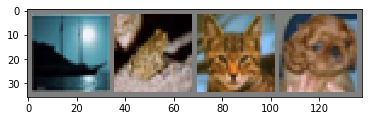

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

### (2) Define a Convolution Neural Network

前に使ったニューラルネットを、3チャンネル画像用にする。



In [0]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

### (3) Define a Loss function and optimizer

Classification Cross-Entropy loss と、 SGD with momentum を使う。



In [0]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

### (4) Train the network

イテレータを回してネットワークに入力し、最適化するだけ。



In [45]:
%%time

for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.171
[1,  4000] loss: 1.863
[1,  6000] loss: 1.670
[1,  8000] loss: 1.584
[1, 10000] loss: 1.499
[1, 12000] loss: 1.458
[2,  2000] loss: 1.386
[2,  4000] loss: 1.346
[2,  6000] loss: 1.341
[2,  8000] loss: 1.312
[2, 10000] loss: 1.291
[2, 12000] loss: 1.272
Finished Training
CPU times: user 1min 44s, sys: 13.1 s, total: 1min 57s
Wall time: 2min 28s


### (5) Test the network on the test data

ネットワークが何を学習したかを確認しよう。


GroundTruth:    cat  ship  ship plane


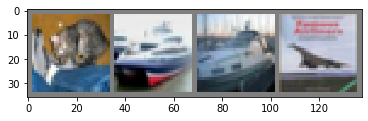

In [46]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [0]:
outputs = net(images)

出力は、10クラスのエネルギーなので、エネルギーが最も高いクラスである確率が高いと考えている。


In [48]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:   frog   car   car  ship


結果はいい感じ！

データセット全体でパフォーマンスを確認します。



In [49]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 53 %


チャンスレベル（10%）よりは良さそうです。

うーん、うまく機能したクラスとうまく機能しなかったクラスは何ですか？



In [50]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 43 %
Accuracy of   car : 73 %
Accuracy of  bird : 39 %
Accuracy of   cat : 30 %
Accuracy of  deer : 43 %
Accuracy of   dog : 22 %
Accuracy of  frog : 70 %
Accuracy of horse : 64 %
Accuracy of  ship : 78 %
Accuracy of truck : 67 %


Training on GPU
----------------

TensorをGPUに転送するのと同じように、ニューラルネットをGPUに転送しよう。

In [51]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assume that we are on a CUDA machine, then this should print a CUDA device:

print(device)

cuda:0


パラメーターとバッファーをCUDAテンソルに変換する。

In [52]:
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [0]:
criterion = criterion.to(device)
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

学習を行う。

In [54]:
%%time

for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.200
[1,  4000] loss: 1.187
[1,  6000] loss: 1.185
[1,  8000] loss: 1.185
[1, 10000] loss: 1.161
[1, 12000] loss: 1.175
[2,  2000] loss: 1.082
[2,  4000] loss: 1.116
[2,  6000] loss: 1.071
[2,  8000] loss: 1.098
[2, 10000] loss: 1.090
[2, 12000] loss: 1.067
Finished Training
CPU times: user 1min 38s, sys: 9.28 s, total: 1min 48s
Wall time: 2min 12s


Training on multiple GPUs
-------------------------
If you want to see even more MASSIVE speedup using all of your GPUs,
please check out :doc:`data_parallel_tutorial`.

Where do I go next?
-------------------

-  :doc:`Train neural nets to play video games </intermediate/reinforcement_q_learning>`
-  `Train a state-of-the-art ResNet network on imagenet`_
-  `Train a face generator using Generative Adversarial Networks`_
-  `Train a word-level language model using Recurrent LSTM networks`_
-  `More examples`_
-  `More tutorials`_
-  `Discuss PyTorch on the Forums`_
-  `Chat with other users on Slack`_





5.Optional: Data Parallelism
==========================
**Authors**: `Sung Kim <https://github.com/hunkim>`_ and `Jenny Kang <https://github.com/jennykang>`_


ここでは、``DataParallel``を使用して複数のGPUを使用する方法を学ぼう。




Pytorchでは、簡単にモデルをGPUに配置できる。

~~~python
device = torch.device("cuda:0")
model.to(device)

mytensor = my_tensor.to(device)
~~~

複数のGPUで順伝播、逆伝播をするのが常識だよ。PytorchはデフォルトでGPUを1つしか使わないから、``DataParallel``で並列実行しよう。


~~~python
model = nn.DataParallel(model)
~~~

Imports and parameters
----------------------

PyTorchモジュールをインポートし、パラメーターを定義する。




In [0]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

# Parameters and DataLoaders
input_size = 5
output_size = 2

batch_size = 30
data_size = 100

In [0]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

Dummy DataSet
-------------

ダミー（ランダム）データセットをつくる。

In [0]:
class RandomDataset(Dataset):

    def __init__(self, size, length):
        self.len = length
        self.data = torch.randn(length, size)

    def __getitem__(self, index):
        return self.data[index]

    def __len__(self):
        return self.len

rand_loader = DataLoader(dataset=RandomDataset(input_size, data_size),
                         batch_size=batch_size, shuffle=True)

Simple Model
------------

デモでは、モデルは入力を取得し、線形演算を実行し、出力を生成する。

入力および出力テンソルのサイズを監視するために、モデル内にprintステートメントを配置したので、バッチランク0で印刷されるものに注意してください。




In [0]:
class Model(nn.Module):
    # Our model

    def __init__(self, input_size, output_size):
        super(Model, self).__init__()
        self.fc = nn.Linear(input_size, output_size)

    def forward(self, input):
        output = self.fc(input)
        print("\tIn Model: input size", input.size(),
              "output size", output.size())

        return output

Create Model and DataParallel
-----------------------------

**これが重要！**

まず、モデルインスタンスを作成し、複数のGPUがあるかどうかを確認出来たら``nn.DataParallel``を使用してモデルをラップできる。

次に、``model.to(device)``によってGPUにモデルを配置できる。



In [59]:
model = Model(input_size, output_size)
if torch.cuda.device_count() > 1:
  print("Let's use", torch.cuda.device_count(), "GPUs!")
  # dim = 0 [30, xxx] -> [10, ...], [10, ...], [10, ...] on 3 GPUs
  model = nn.DataParallel(model)

model.to(device)

Model(
  (fc): Linear(in_features=5, out_features=2, bias=True)
)

> Google Colabolatory では GPU 1枚みたい。

Run the Model
-------------

これで、入力テンソルと出力テンソルのサイズを確認できます。




In [60]:
for data in rand_loader:
    input = data.to(device)
    output = model(input)
    print("Outside: input size", input.size(),
          "output_size", output.size())

	In Model: input size torch.Size([30, 5]) output size torch.Size([30, 2])
Outside: input size torch.Size([30, 5]) output_size torch.Size([30, 2])
	In Model: input size torch.Size([30, 5]) output size torch.Size([30, 2])
Outside: input size torch.Size([30, 5]) output_size torch.Size([30, 2])
	In Model: input size torch.Size([30, 5]) output size torch.Size([30, 2])
Outside: input size torch.Size([30, 5]) output_size torch.Size([30, 2])
	In Model: input size torch.Size([10, 5]) output size torch.Size([10, 2])
Outside: input size torch.Size([10, 5]) output_size torch.Size([10, 2])


## Results



2 GPUs
~~~
    Let's use 2 GPUs!
        In Model: input size torch.Size([15, 5]) output size torch.Size([15, 2])
        In Model: input size torch.Size([15, 5]) output size torch.Size([15, 2])
    Outside: input size torch.Size([30, 5]) output_size torch.Size([30, 2])
        In Model: input size torch.Size([15, 5]) output size torch.Size([15, 2])
        In Model: input size torch.Size([15, 5]) output size torch.Size([15, 2])
    Outside: input size torch.Size([30, 5]) output_size torch.Size([30, 2])
        In Model: input size torch.Size([15, 5]) output size torch.Size([15, 2])
        In Model: input size torch.Size([15, 5]) output size torch.Size([15, 2])
    Outside: input size torch.Size([30, 5]) output_size torch.Size([30, 2])
        In Model: input size torch.Size([5, 5]) output size torch.Size([5, 2])
        In Model: input size torch.Size([5, 5]) output size torch.Size([5, 2])
    Outside: input size torch.Size([10, 5]) output_size torch.Size([10, 2])
~~~

3 GPUs

~~~
    Let's use 3 GPUs!
        In Model: input size torch.Size([10, 5]) output size torch.Size([10, 2])
        In Model: input size torch.Size([10, 5]) output size torch.Size([10, 2])
        In Model: input size torch.Size([10, 5]) output size torch.Size([10, 2])
    Outside: input size torch.Size([30, 5]) output_size torch.Size([30, 2])
        In Model: input size torch.Size([10, 5]) output size torch.Size([10, 2])
        In Model: input size torch.Size([10, 5]) output size torch.Size([10, 2])
        In Model: input size torch.Size([10, 5]) output size torch.Size([10, 2])
    Outside: input size torch.Size([30, 5]) output_size torch.Size([30, 2])
        In Model: input size torch.Size([10, 5]) output size torch.Size([10, 2])
        In Model: input size torch.Size([10, 5]) output size torch.Size([10, 2])
        In Model: input size torch.Size([10, 5]) output size torch.Size([10, 2])
    Outside: input size torch.Size([30, 5]) output_size torch.Size([30, 2])
        In Model: input size torch.Size([4, 5]) output size torch.Size([4, 2])
        In Model: input size torch.Size([4, 5]) output size torch.Size([4, 2])
        In Model: input size torch.Size([2, 5]) output size torch.Size([2, 2])
    Outside: input size torch.Size([10, 5]) output_size torch.Size([10, 2])
~~~

8 GPUs

~~~
    Let's use 8 GPUs!
        In Model: input size torch.Size([4, 5]) output size torch.Size([4, 2])
        In Model: input size torch.Size([4, 5]) output size torch.Size([4, 2])
        In Model: input size torch.Size([2, 5]) output size torch.Size([2, 2])
        In Model: input size torch.Size([4, 5]) output size torch.Size([4, 2])
        In Model: input size torch.Size([4, 5]) output size torch.Size([4, 2])
        In Model: input size torch.Size([4, 5]) output size torch.Size([4, 2])
        In Model: input size torch.Size([4, 5]) output size torch.Size([4, 2])
        In Model: input size torch.Size([4, 5]) output size torch.Size([4, 2])
    Outside: input size torch.Size([30, 5]) output_size torch.Size([30, 2])
        In Model: input size torch.Size([4, 5]) output size torch.Size([4, 2])
        In Model: input size torch.Size([4, 5]) output size torch.Size([4, 2])
        In Model: input size torch.Size([4, 5]) output size torch.Size([4, 2])
        In Model: input size torch.Size([4, 5]) output size torch.Size([4, 2])
        In Model: input size torch.Size([4, 5]) output size torch.Size([4, 2])
        In Model: input size torch.Size([4, 5]) output size torch.Size([4, 2])
        In Model: input size torch.Size([2, 5]) output size torch.Size([2, 2])
        In Model: input size torch.Size([4, 5]) output size torch.Size([4, 2])
    Outside: input size torch.Size([30, 5]) output_size torch.Size([30, 2])
        In Model: input size torch.Size([4, 5]) output size torch.Size([4, 2])
        In Model: input size torch.Size([4, 5]) output size torch.Size([4, 2])
        In Model: input size torch.Size([4, 5]) output size torch.Size([4, 2])
        In Model: input size torch.Size([4, 5]) output size torch.Size([4, 2])
        In Model: input size torch.Size([4, 5]) output size torch.Size([4, 2])
        In Model: input size torch.Size([4, 5]) output size torch.Size([4, 2])
        In Model: input size torch.Size([4, 5]) output size torch.Size([4, 2])
        In Model: input size torch.Size([2, 5]) output size torch.Size([2, 2])
    Outside: input size torch.Size([30, 5]) output_size torch.Size([30, 2])
        In Model: input size torch.Size([2, 5]) output size torch.Size([2, 2])
        In Model: input size torch.Size([2, 5]) output size torch.Size([2, 2])
        In Model: input size torch.Size([2, 5]) output size torch.Size([2, 2])
        In Model: input size torch.Size([2, 5]) output size torch.Size([2, 2])
        In Model: input size torch.Size([2, 5]) output size torch.Size([2, 2])
    Outside: input size torch.Size([10, 5]) output_size torch.Size([10, 2])
~~~


詳細は、 https://pytorch.org/tutorials/beginner/former_torchies/parallelism_tutorial.html


